In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
'''Importing necessary libraries'''

import numpy as np
import matplotlib.pyplot as plt
from numpy import random

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras import utils as np_utils
from tensorflow.python.framework.ops import disable_eager_execution

from keras.datasets import mnist
from keras.optimizers import SGD

from sklearn.model_selection import train_test_split

In [ ]:
disable_eager_execution()

In [ ]:
random.seed(7)

In [ ]:
'''loading MNIST dataset'''

(x_trainA, y_trainA), (x_testA, y_testA) = mnist.load_data()

In [ ]:
'''Concatenating into one single data for preprocessing'''

X = np.concatenate((x_trainA,x_testA), axis=0)
Y = np.concatenate((y_trainA,y_testA), axis=0)

In [ ]:
X.shape, Y.shape

((70000, 28, 28), (70000,))

In [ ]:
'''Normalizing the pixel values'''

X = X / 255.0

In [ ]:
'''splitting MNIST into two partitions (0-4) and (5-9)'''

'''Getting indexes '''
idx0_4, idx5_9 = [], []

for i in range(0,10):
  if i < 5:
    idx0_4.append(np.where(Y==i)) # filter mnist data for 0-4
  else:
    idx5_9.append(np.where(Y==i)) # filter mnist data for 5-9

In [ ]:
'''Combining labels for the two partitions'''

index0_4 = np.concatenate((idx0_4[0][0], idx0_4[1][0], idx0_4[2][0], idx0_4[3][0], idx0_4[4][0]), axis=0)
index5_9 = np.concatenate((idx5_9[0][0], idx5_9[1][0], idx5_9[2][0], idx5_9[3][0], idx5_9[4][0]), axis=0)

In [ ]:
'''Getting labels'''

y0_4 = Y[index0_4]
y5_9 = Y[index5_9]

In [ ]:
'''Getting corresponding images'''

img0_4 = X[[index0_4]] # get mnist data for 0-4
img5_9 = X[[index5_9]] # get mnist data for 5-9

img0_4.shape, img5_9.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


((35735, 28, 28), (34265, 28, 28))

In [80]:
'''Creating a MLP'''

def create_model():
  model = models.Sequential([
      layers.Dense(800, activation='relu', input_dim=784),
      layers.Dropout(0.5),
      layers.Dense(800, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(800, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(5, activation='softmax'),
      
  ])
  return model

In [ ]:
'''Setting up optimizer'''

from keras.optimizers import Adam
opt = SGD(lr=0.05)
batch_size = 64
patience = 5
clipgrad = 10000

In [ ]:
'''Function for plotting training and validation accuracy'''

def plot(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.legend(['acc', 'val_acc'])
  plt.grid(True)

In [ ]:
'''Function to compile and fit model'''

def compile_and_fit(model, xa, xb, validation_data, epochs, loss, filename):
  model.compile(optimizer = opt, loss=loss, metrics=['accuracy'])
  history = model.fit(xa, xb, epochs=epochs, validation_data=validation_data)
  model.save_weights(f'/content/drive/MyDrive/552 PROJECT/IMM/{filename}.h5')
  return model, history

In [ ]:
import numpy as np
import keras.backend as K
from keras.regularizers import Regularizer

class L2reg(Regularizer):
    def __init__(self, prior_weights, Lambda=0.1):
        self.prior_weights = prior_weights
        self.Lambda = Lambda

    def __call__(self, x):
        regularization = 0.
        regularization = regularization + self.Lambda * K.sum(K.square(x - self.prior_weights))
        return regularization

    def get_config(self):
        return {'Lambda': float(self.Lambda)}

# Task 1: Training on MNIST (0-4)

In [ ]:
'''Setting up X and Y for the first task'''

X0_4 = img0_4
Y0_4 = y0_4

In [ ]:
'''Splitting the data into training and testing data'''

x_train0_4, x_test0_4, y_train0_4, y_test0_4 = train_test_split(X0_4, Y0_4, test_size=0.2)

In [ ]:
x_train0_4.shape, y_train0_4.shape, x_test0_4.shape, y_test0_4.shape

((28588, 28, 28), (28588,), (7147, 28, 28), (7147,))

In [ ]:
'''reshaping inputs to feed to dense layer of network'''

x_train0_4 = x_train0_4.reshape((-1, 784))
x_test0_4 = x_test0_4.reshape((-1, 784))

In [ ]:
model0_4 = models.Sequential([
    layers.Dense(800, input_dim = 784, activation='relu'),#, kernel_regularizer=L2reg(model0_4.weights[0]), bias_regularizer=L2reg(model0_4.weights[1])),
    layers.Dropout(0.5),
    layers.Dense(800, activation='relu'),#, kernel_regularizer = L2reg(model0_4.weights[2]), bias_regularizer = L2reg(model0_4.weights[3])),
    layers.Dropout(0.5),
    layers.Dense(800, activation='relu'),# kernel_regularizer = L2reg(model0_4.weights[4]), bias_regularizer = L2reg(model0_4.weights[5])),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax'),# kernel_regularizer = L2reg(model0_4.weights[6]), bias_regularizer= L2reg(model0_4.weights[7]))
])
model0_4.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout_3 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 800)               640800    
_________________________________________________________________
dropout_4 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 800)               640800    
_________________________________________________________________
dropout_5 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                

In [ ]:
'''Compiling and training the model on task 1'''
'''Save weights for initializing the next model'''

model0_4.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

history0_4 = model0_4.fit(x_train0_4, y_train0_4, epochs=50, validation_data = (x_test0_4, y_test0_4))

model0_4.save('model0_4')
model0_4.save_weights('/content/drive/MyDrive/552 PROJECT/IMM/task1mnist0_4.h5')

Train on 28588 samples, validate on 7147 samples
Epoch 1/50
28544/28588 [============================>.] - ETA: 0s - loss: 0.2247 - accuracy: 0.9284

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


28588/28588 [==============================] - 18s 626us/sample - loss: 0.2245 - accuracy: 0.9284 - val_loss: 0.0853 - val_accuracy: 0.9723
Epoch 2/50
28588/28588 [==============================] - 18s 627us/sample - loss: 0.0893 - accuracy: 0.9724 - val_loss: 0.0635 - val_accuracy: 0.9790
Epoch 3/50
28588/28588 [==============================] - 18s 626us/sample - loss: 0.0647 - accuracy: 0.9806 - val_loss: 0.0493 - val_accuracy: 0.9854
Epoch 4/50
28588/28588 [==============================] - 18s 627us/sample - loss: 0.0515 - accuracy: 0.9846 - val_loss: 0.0469 - val_accuracy: 0.9849
Epoch 5/50
28588/28588 [==============================] - 18s 626us/sample - loss: 0.0448 - accuracy: 0.9865 - val_loss: 0.0387 - val_accuracy: 0.9888
Epoch 6/50
28588/28588 [==============================] - 18s 637us/sample - loss: 0.0377 - accuracy: 0.9883 - val_loss: 0.0348 - val_accuracy: 0.9899
Epoch 7/50
28588/28588 [==============================] - 17s 607us/sample - loss: 0.0315 - accuracy: 0.9

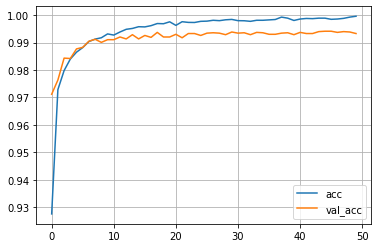

In [ ]:
plot(history0_4)

# Task 2: Training on MNIST (5-9)

In [ ]:
'''Setting up X and Y for the second task'''

X5_9 = img5_9
Y5_9 = y5_9

In [ ]:
'''Encoding labels 5-9 into 0-4 since the model's last dense (softmax) wont accept values starting from 5'''

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y5_9 = encoder.fit_transform(Y5_9)
y5_9

array([0, 0, 0, ..., 4, 4, 4])

In [ ]:
Y5_9

array([5, 5, 5, ..., 9, 9, 9], dtype=uint8)

In [ ]:
'''Splitting the data into training and testing data'''

x_train5_9, x_test5_9, y_train5_9, y_test5_9 = train_test_split(X5_9, y5_9, test_size=0.2)

In [ ]:
x_train5_9.shape, y_train5_9.shape, x_test5_9.shape, y_test5_9.shape

((27412, 28, 28), (27412,), (6853, 28, 28), (6853,))

In [ ]:
'''reshaping inputs to feed to dense layer of network'''

x_train5_9 = x_train5_9.reshape((-1, 784))
x_test5_9 = x_test5_9.reshape((-1, 784))

In [ ]:
model5_9 = models.Sequential([
    layers.Dense(800, input_dim = 784, activation='relu', kernel_regularizer=L2reg(model0_4.weights[0]), bias_regularizer=L2reg(model0_4.weights[1])),
    layers.Dropout(0.5),
    layers.Dense(800, activation='relu', kernel_regularizer = L2reg(model0_4.weights[2]), bias_regularizer = L2reg(model0_4.weights[3])),
    layers.Dropout(0.5),
    layers.Dense(800, activation='relu',kernel_regularizer = L2reg(model0_4.weights[4]), bias_regularizer = L2reg(model0_4.weights[5])),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax',kernel_regularizer = L2reg(model0_4.weights[6]), bias_regularizer= L2reg(model0_4.weights[7]))
])

model5_9.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 800)               628000    
_________________________________________________________________
dropout_6 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 800)               640800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 800)               640800    
_________________________________________________________________
dropout_8 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 5)                

In [ ]:
'''compiling and training the model for task 2'''
'''Load weights from the previous task so that same model is used'''
'''Save weights for initializing the next model'''

model5_9.compile(optimizer=opt, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])


model5_9.load_weights('/content/drive/MyDrive/552 PROJECT/IMM/task1mnist0_4.h5')

history5_9 = model5_9.fit(x_train5_9, y_train5_9, epochs=50, validation_data = (x_test5_9, y_test5_9))

model5_9.save_weights('/content/drive/MyDrive/552 PROJECT/IMM/task2mnist5_9.h5')

Train on 27412 samples, validate on 6853 samples
Epoch 1/50
27200/27412 [============================>.] - ETA: 0s - loss: 1.1727 - accuracy: 0.8465

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27412/27412 [==============================] - 4s 141us/sample - loss: 1.1731 - accuracy: 0.8465 - val_loss: 0.9725 - val_accuracy: 0.9132
Epoch 2/50
27412/27412 [==============================] - 4s 136us/sample - loss: 1.1265 - accuracy: 0.8592 - val_loss: 1.0073 - val_accuracy: 0.8846
Epoch 3/50
27412/27412 [==============================] - 4s 130us/sample - loss: 1.1315 - accuracy: 0.8556 - val_loss: 0.9478 - val_accuracy: 0.9076
Epoch 4/50
27412/27412 [==============================] - 4s 130us/sample - loss: 1.1255 - accuracy: 0.8582 - val_loss: 1.0454 - val_accuracy: 0.8935
Epoch 5/50
27412/27412 [==============================] - 4s 129us/sample - loss: 1.1211 - accuracy: 0.8573 - val_loss: 0.9499 - val_accuracy: 0.8954
Epoch 6/50
27412/27412 [==============================] - 4s 131us/sample - loss: 1.1252 - accuracy: 0.8581 - val_loss: 0.9614 - val_accuracy: 0.9113
Epoch 7/50
27412/27412 [==============================] - 4s 134us/sample - loss: 1.1241 - accuracy: 0.8591 - v

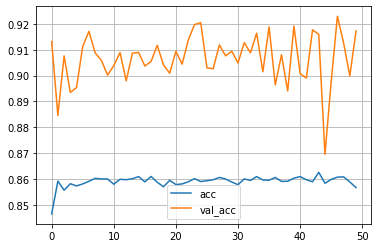

In [55]:
'''Plotting the accuracy over training period'''

plot(history5_9)

[5]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


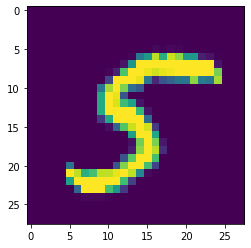

In [56]:
'''checking predictions'''

print(encoder.inverse_transform(model5_9.predict_classes(x_test5_9[0].reshape(-1,784))))
plt.imshow(x_test5_9[0].reshape(28,28))

# Task 3: training on shuffled (pixel shuffling) images (mnist 0-4)

In [57]:
'''Setting up X and Y for the third task'''

pX0_4 = img0_4
pY0_4 = y0_4

In [58]:
'''Shuffling the pixels'''

i = np.arange(pX0_4.shape[1])
np.random.shuffle(i)

pX0_4 = pX0_4[:, i]

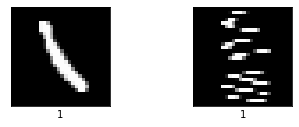

In [59]:
'''visualizing the shuffled images'''

plt.subplot(2,2,3)
plt.imshow(img0_4[9883].reshape(28,28), cmap='gray')
plt.xlabel(y0_4[9883])
plt.xticks([])
plt.yticks([])

plt.subplot(2,2,4)
plt.imshow(pX0_4[9883].reshape(28,28), cmap='gray')
plt.xlabel(pY0_4[9883])
plt.xticks([])
plt.yticks([])


plt.show()

In [60]:
'''splitting data into training and testing data'''

pX_train0_4, pX_test0_4, pY_train0_4, pY_test0_4 = train_test_split(pX0_4, pY0_4, test_size=0.2)

In [61]:
'''reshaping inputs to feed to dense layer of network'''

pX_train0_4 = pX_train0_4.reshape((-1, 784))
pX_test0_4 = pX_test0_4.reshape((-1, 784))

In [62]:
'''creating a new model'''

modelp0_4 = models.Sequential([
    layers.Dense(800, input_dim = 784, activation='relu', kernel_regularizer=L2reg(model5_9.weights[0]), bias_regularizer=L2reg(model5_9.weights[1])),
    layers.Dropout(0.5),
    layers.Dense(800, activation='relu', kernel_regularizer = L2reg(model5_9.weights[2]), bias_regularizer = L2reg(model5_9.weights[3])),
    layers.Dropout(0.5),
    layers.Dense(800, activation='relu',kernel_regularizer = L2reg(model5_9.weights[4]), bias_regularizer = L2reg(model5_9.weights[5])),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax',kernel_regularizer = L2reg(model5_9.weights[6]), bias_regularizer= L2reg(model5_9.weights[7]))
])

modelp0_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 800)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 800)               640800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 800)               640800    
_________________________________________________________________
dropout_11 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 5)                

In [63]:
'''compiling and training the model for task 3'''
'''Load weights from the previous task so that same model is used'''
'''Save weights for initializing the next model'''

modelp0_4.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

modelp0_4.load_weights('/content/drive/MyDrive/552 PROJECT/IMM/task2mnist5_9.h5')

historyp0_4 = modelp0_4.fit(pX_train0_4, pY_train0_4, epochs=50, validation_data = (pX_test0_4, pY_test0_4))

modelp0_4.save_weights('/content/drive/MyDrive/552 PROJECT/IMM/task3pmnist0_4.h5')

Train on 28588 samples, validate on 7147 samples
Epoch 1/50
28588/28588 [==============================] - ETA: 0s - loss: 0.4685 - accuracy: 0.9307

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


28588/28588 [==============================] - 4s 140us/sample - loss: 0.4685 - accuracy: 0.9307 - val_loss: 0.4149 - val_accuracy: 0.9548
Epoch 2/50
28588/28588 [==============================] - 4s 129us/sample - loss: 0.4633 - accuracy: 0.9353 - val_loss: 0.3784 - val_accuracy: 0.9569
Epoch 3/50
28588/28588 [==============================] - 4s 130us/sample - loss: 0.4612 - accuracy: 0.9368 - val_loss: 0.3686 - val_accuracy: 0.9701
Epoch 4/50
28588/28588 [==============================] - 4s 128us/sample - loss: 0.4608 - accuracy: 0.9361 - val_loss: 0.3568 - val_accuracy: 0.9656
Epoch 5/50
28588/28588 [==============================] - 4s 129us/sample - loss: 0.4552 - accuracy: 0.9370 - val_loss: 0.3465 - val_accuracy: 0.9668
Epoch 6/50
28588/28588 [==============================] - 4s 127us/sample - loss: 0.4533 - accuracy: 0.9371 - val_loss: 0.4232 - val_accuracy: 0.9507
Epoch 7/50
28588/28588 [==============================] - 4s 127us/sample - loss: 0.4576 - accuracy: 0.9370 - v

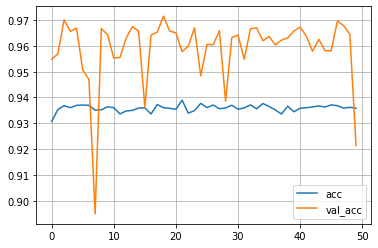

In [64]:
'''Plotting the accuracy over training period'''

plot(historyp0_4)

# Task 4: training on shuffled (pixel shuffling) images (mnist 5-9)

In [65]:
'''Setting up X and Y for the second task'''

pX5_9 = img5_9
pY5_9 = y5_9

In [66]:
'''Encoding labels 5-9 into 0-4 since the model's last dense (softmax) wont accept values starting from 5'''

from sklearn.preprocessing import LabelEncoder

encoder2 = LabelEncoder()
pY5_9 = encoder2.fit_transform(pY5_9)
pY5_9

array([0, 0, 0, ..., 4, 4, 4])

In [67]:
'''Shuffling the pixels'''

i = np.arange(pX5_9.shape[1])
np.random.shuffle(i)

pX5_9 = pX5_9[:, i]

In [68]:
'''splitting data into training and testing data'''

pX_train5_9, pX_test5_9, pY_train5_9, pY_test5_9 = train_test_split(pX5_9, pY5_9, test_size=0.2)

In [69]:
'''reshaping inputs to feed to dense layer of network'''

pX_train5_9 = pX_train5_9.reshape((-1, 784))
pX_test5_9 = pX_test5_9.reshape((-1, 784))

In [70]:
'''creating a new model'''

modelp5_9 = models.Sequential([
    layers.Dense(800, input_dim = 784, activation='relu', kernel_regularizer=L2reg(modelp0_4.weights[0]), bias_regularizer=L2reg(modelp0_4.weights[1])),
    layers.Dropout(0.5),
    layers.Dense(800, activation='relu', kernel_regularizer = L2reg(modelp0_4.weights[2]), bias_regularizer = L2reg(modelp0_4.weights[3])),
    layers.Dropout(0.5),
    layers.Dense(800, activation='relu',kernel_regularizer = L2reg(modelp0_4.weights[4]), bias_regularizer = L2reg(modelp0_4.weights[5])),
    layers.Dropout(0.5),
    layers.Dense(5, activation='softmax',kernel_regularizer = L2reg(modelp0_4.weights[6]), bias_regularizer= L2reg(modelp0_4.weights[7]))
])

modelp5_9.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 800)               628000    
_________________________________________________________________
dropout_12 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 800)               640800    
_________________________________________________________________
dropout_13 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 800)               640800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 800)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 5)                

In [71]:
'''compiling and training the model for task 3'''
'''Load weights from the previous task so that same model is used'''
'''Save weights for initializing the next model'''


modelp5_9.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

modelp5_9.load_weights('/content/drive/MyDrive/552 PROJECT/IMM/task3pmnist0_4.h5')

historyp5_9 = modelp5_9.fit(pX_train5_9, pY_train5_9, epochs=50, validation_data = (pX_test5_9, pY_test5_9))

modelp5_9.save_weights('/content/drive/MyDrive/552 PROJECT/IMM/task4pmnist5_9.h5')

Train on 27412 samples, validate on 6853 samples
Epoch 1/50
27392/27412 [============================>.] - ETA: 0s - loss: 0.8755 - accuracy: 0.8494

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


27412/27412 [==============================] - 4s 144us/sample - loss: 0.8754 - accuracy: 0.8494 - val_loss: 0.6629 - val_accuracy: 0.9263
Epoch 2/50
27412/27412 [==============================] - 4s 130us/sample - loss: 0.8522 - accuracy: 0.8637 - val_loss: 0.6512 - val_accuracy: 0.9323
Epoch 3/50
27412/27412 [==============================] - 4s 131us/sample - loss: 0.8454 - accuracy: 0.8664 - val_loss: 0.6746 - val_accuracy: 0.9167
Epoch 4/50
27412/27412 [==============================] - 4s 128us/sample - loss: 0.8495 - accuracy: 0.8646 - val_loss: 0.6871 - val_accuracy: 0.9195
Epoch 5/50
27412/27412 [==============================] - 4s 129us/sample - loss: 0.8453 - accuracy: 0.8644 - val_loss: 0.7279 - val_accuracy: 0.9106
Epoch 6/50
27412/27412 [==============================] - 4s 129us/sample - loss: 0.8492 - accuracy: 0.8654 - val_loss: 0.7400 - val_accuracy: 0.8995
Epoch 7/50
27412/27412 [==============================] - 4s 128us/sample - loss: 0.8569 - accuracy: 0.8623 - v

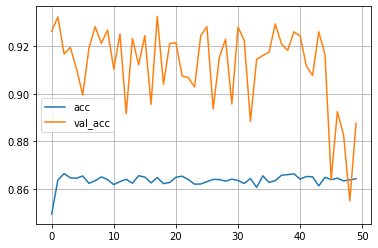

In [72]:
'''Plotting the accuracy over training period'''

plot(historyp5_9)

# Checking accuracy change on Task A with IMM_Mean

In [81]:
'''creating dictionary to save model weights and bias by layer'''

def create_parameter_dict(layers, params):  
  model_dict = {1:[], 2:[], 3:[], 4:[]}
  p = 0
  for layer in range(1, layers+1): 
    model_dict[layer].append(params[p])
    model_dict[layer].append(params[p+1])
    p = p + 2
  return model_dict

In [82]:
'''creating array of weights and bias for all models (weights format)'''

def create_new_model(layers, models):
  
  no_of_models = len(models)
  new_model = {}


  # creating new model parameter dictionary
  for layer in range(1, layers+1):
    new_model[layer] = []
  

  for layer in range(1, layers+1): # loop layer by layer
    weights = 0
    for n in range(no_of_models): # summation of same layer for all models
      weights = weights + models[n][layer][0]
    
    weights = weights / no_of_models
    new_model[layer].append(weights)
    

  for layer in range(1, layers+1): # loop layer by layer
    bias = 0
    for n in range(no_of_models): # summation of same layer for all models
      bias = bias + models[n][layer][1]    
    
    bias = bias / no_of_models
    new_model[layer].append(bias)
  
  # returning new model weights
  return new_model

In [83]:
'''Creating model_weight dictionaries'''

nlayers = 4

params0_4 = model0_4.get_weights()
model0_4_dict = create_parameter_dict(nlayers, params0_4)

params5_9 = model5_9.get_weights()
model5_9_dict = create_parameter_dict(nlayers, params5_9)

paramsP0_4 = modelp0_4.get_weights()
modelP0_4_dict = create_parameter_dict(nlayers, paramsP0_4)

paramsP5_9 = modelp0_4.get_weights()
modelP5_9_dict = create_parameter_dict(nlayers, paramsP5_9)

In [84]:
'''creating arrays of weights and biases'''

after2tasks_model_dict = create_new_model(nlayers, [model0_4_dict, model5_9_dict])
after2tasks_model = []
for i in after2tasks_model_dict.keys():
  after2tasks_model.append(after2tasks_model_dict[i][0])
  after2tasks_model.append(after2tasks_model_dict[i][1])

In [85]:
'''creating arrays of weights and biases'''

after3tasks_model_dict = create_new_model(nlayers, [model0_4_dict, model5_9_dict, modelP0_4_dict])
after3tasks_model = []
for i in after3tasks_model_dict.keys():
  after3tasks_model.append(after3tasks_model_dict[i][0])
  after3tasks_model.append(after3tasks_model_dict[i][1])

In [86]:
'''creating arrays of weights and biases'''

after4tasks_model_dict = create_new_model(nlayers, [model0_4_dict, model5_9_dict, modelP0_4_dict, modelP5_9_dict])
after4tasks_model = []
for i in after4tasks_model_dict.keys():
  after4tasks_model.append(after4tasks_model_dict[i][0])
  after4tasks_model.append(after4tasks_model_dict[i][1])

In [87]:
'''creating 3 new models for evaluating performance on Task A after training on:
(i) Task B
(ii) Task B and Task C
(iii) Task B, Task C and Task D'''

imm2 = create_model()
imm3 = create_model()
imm4 = create_model()

In [88]:
'''Initializing weights and biases for newly created models'''

def set_model_weights(new_model, weights):
  lc = 0
  for i in range(0, 8, 2):
    layer = []
    layer.append(weights[i])
    layer.append(weights[i+1])
    new_model.layers[lc].set_weights(layer)
    lc = lc + 2
  return new_model

In [89]:
'''Initialize models with appropriate weights and biases'''

imm2 = set_model_weights(imm2, after2tasks_model)
imm3 = set_model_weights(imm3, after3tasks_model)
imm4 = set_model_weights(imm4, after4tasks_model)

In [90]:
'''evaluating accuracy after training on task b'''

imm2.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
imm2_accuracy = round(imm2.evaluate(x_test0_4, y_test0_4)[1]*100, 2)
imm2_accuracy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


99.29

In [91]:
'''evaluating accuracy after training on task b and task c'''

imm3.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
imm3_accuracy = round(imm3.evaluate(x_test0_4, y_test0_4)[1]*100, 2)
imm3_accuracy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


99.05

In [92]:
'''evaluating accuracy after training on task b, task c and task d'''

imm4.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics=['accuracy'])
imm4_accuracy = round(imm4.evaluate(x_test0_4, y_test0_4)[1]*100, 2)
imm4_accuracy

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


98.82

In [93]:
original_acc = round(model0_4.evaluate(x_test0_4, y_test0_4)[1]*100, 2)
original_acc

99.33

In [94]:
accuracies = [original_acc, imm2_accuracy, imm3_accuracy, imm4_accuracy]

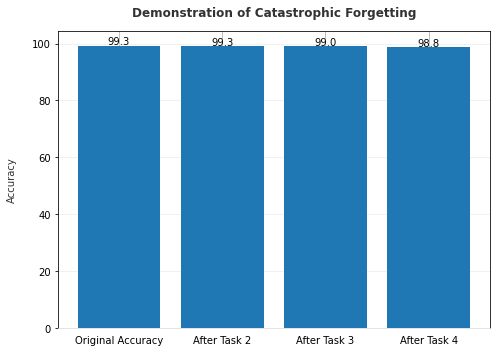

In [95]:
fig, ax = plt.subplots()

fig.set_size_inches(7, 5, forward=True)

x = ['Original Accuracy', 'After Task 2', 'After Task 3', 'After Task 4']
y = accuracies

# Save the chart so we can loop through the bars below.
bars = ax.bar(
    x = x,
    height=y,
    tick_label=x
)

# Axis formatting.
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_color('#DDDDDE')
ax.tick_params(bottom=False, left=True)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True)

# Add text annotations to the top of the bars.
bar_color = bars[0].get_facecolor()
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      horizontalalignment='center',
      color='black'
      #weight='bold'
  )

# Add labels and a title. Note the use of `labelpad` and `pad` to add some
# extra space between the text and the tick labels.
#ax.set_xlabel('Different methods', labelpad=15, color='#333333')
ax.set_ylabel('Accuracy', labelpad=15, color='#333333')
ax.set_title('Demonstration of Catastrophic Forgetting', pad=15, color='#333333',
             weight='bold')

fig.tight_layout()

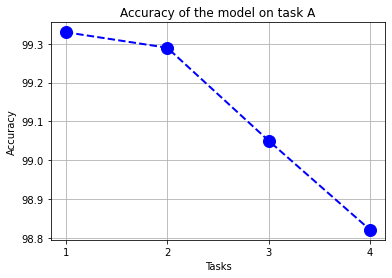

In [96]:

plt.title('Accuracy of the model on task A')
plt.plot([1,2,3,4], accuracies, color='blue', marker='o', linestyle='dashed', linewidth=2, markersize=12)
plt.xticks([1,2,3,4])
plt.xlabel('Tasks')
plt.ylabel('Accuracy')
plt.grid(True)